<h1><font color='blue'>Lending Club</font></h1>

In [2]:
# Import the python environment libraries
import sklearn
import numpy as np
import pandas as pd
#import seaborn as sb
#from sklearn.linear_model import SGDClassifier
#from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
import collections
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

In [10]:
# Import the data 
data = pd.read_csv("data.csv", parse_dates = [1])

#Adding additional dates to the dataframe 
df_date_split = pd.DatetimeIndex(data['issue_d'])
data['issue_year'] = df_date_split.year
data['issue_month'] = df_date_split.month

# Setting the initial features
df_features = data.copy()
del df_features['id']
del df_features['new_int_rate']
del df_features['issue_d']



# Hash the dataset until we determine columns that require it
data['grade'] = data['grade'].apply(hash)
data['sub_grade'] = data['sub_grade'].apply(hash)
data['home_ownership'] = data['home_ownership'].apply(hash)
data['verification_status'] = data['verification_status'].apply(hash)
data['loan_status'] = data['loan_status'].apply(hash)
data['pymnt_plan'] = data['pymnt_plan'].apply(hash)
data['purpose'] = data['purpose'].apply(hash)
data['addr_state'] = data['addr_state'].apply(hash)

# Preview the data
data.head(1)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,new_int_rate,int_bucket,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,-141909181,406699638,...,0.0,0.0,42384.0,171.62,42659.0,0,11,2,2016,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41034 entries, 0 to 41033
Data columns (total 44 columns):
id                         41034 non-null int64
member_id                  41034 non-null object
loan_amnt                  41034 non-null int64
funded_amnt                41034 non-null int64
funded_amnt_inv            41034 non-null float64
term                       41034 non-null int64
int_rate                   41034 non-null float64
installment                41034 non-null float64
grade                      41034 non-null int64
sub_grade                  41034 non-null int64
emp_length                 41034 non-null int64
home_ownership             41034 non-null int64
annual_inc                 41034 non-null float64
verification_status        41034 non-null int64
issue_d                    41034 non-null object
loan_status                41034 non-null int64
pymnt_plan                 41034 non-null int64
purpose                    41034 non-null int64
zip_code         

In [6]:
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,new_int_rate,int_bucket
count,4.103400e+04,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,4.103400e+04,4.103400e+04,41034.000000,...,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000
mean,6.803563e+05,11165.055198,10892.249720,10410.807692,42.421992,0.121650,323.607605,-5.968561e+07,-7.415852e+08,4.955500,...,11628.843007,9771.535496,2272.400019,1.440160,98.520570,13.321207,2663.782731,0.045182,12.156748,1.883852
std,2.051338e+05,7436.656392,7168.313752,7094.097797,10.624903,0.037359,208.869736,1.820786e+08,1.072138e+09,3.460698,...,9007.955901,7120.193342,2615.271056,7.557528,699.759165,153.860237,4424.451962,0.208642,3.729718,0.748982
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,0.054200,15.670000,-2.699096e+08,-1.746946e+09,0.000000,...,0.000000,0.000000,3.540000,0.000000,0.000000,0.000000,0.010000,0.000000,5.000000,1.000000
25%,5.115498e+05,5400.000000,5200.000000,5000.000000,36.000000,0.096200,166.500000,-1.419092e+08,-1.734622e+09,2.000000,...,5162.110000,4500.000000,666.682500,0.000000,0.000000,0.000000,216.590000,0.000000,10.000000,1.000000
50%,6.551805e+05,9975.000000,9600.000000,8975.000000,36.000000,0.119900,278.530000,-1.419092e+08,-1.722298e+09,4.000000,...,9308.380000,8000.000000,1353.935000,0.000000,0.000000,0.000000,545.645000,0.000000,12.000000,2.000000
75%,8.324275e+05,15000.000000,15000.000000,14400.000000,60.000000,0.147400,429.695000,1.140916e+08,4.066996e+08,9.000000,...,15868.740000,13750.000000,2847.967500,0.000000,0.000000,0.000000,3268.897500,0.000000,15.000000,2.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,0.245900,1305.190000,4.980927e+08,4.313481e+08,10.000000,...,58563.680000,35000.020000,23859.910000,209.000000,29623.350000,7002.190000,36115.200000,2.000000,25.000000,4.000000


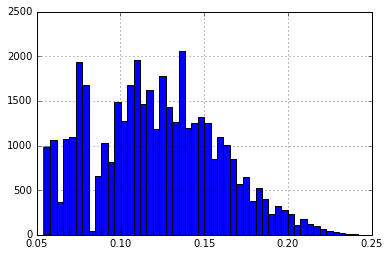

In [7]:
data['int_rate'].hist(bins=50)

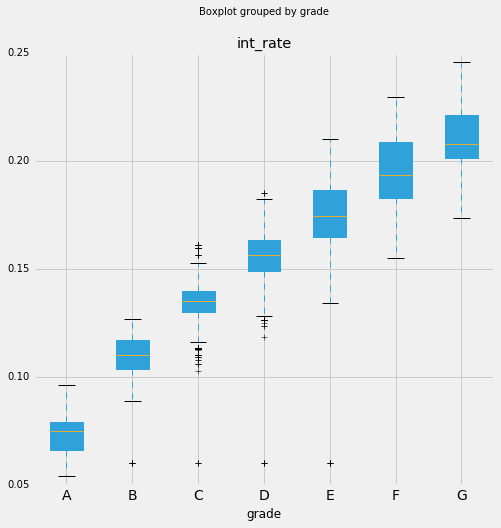

In [36]:
# Boxplot for int_rate over grade
data.boxplot(column="int_rate", by= "grade",figsize= (8,8),patch_artist=True)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.style.use('ggplot')

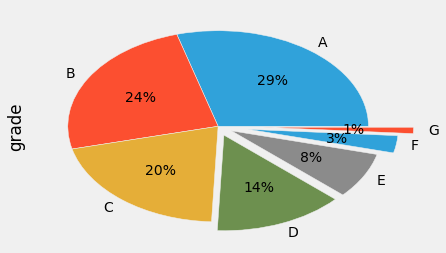

In [35]:
# Pie chart representing grade distributions
explode = (0,0,0,0.1,0.1,0.2,0.3)
data['grade'].value_counts().plot.pie(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G'], explode=explode, autopct='%1.0f%%',)


In [28]:
#use this function to randomly select the features
#we should look at a few thousand scenarios as we explore the best scores
def RandomFeatures():
    features = df_features.columns.values.tolist()
    results = list()
    for f in features:
        randomNumber = random.randint(1, 10)
        if randomNumber >= 5:
            results.append(f)
        
    return results


In [29]:
#automated classifier support
'''
train_c = features to use
model = KNN,LOG_REG, ETC
ts = test size (.4)
'''
def PredStats(train_c,model,ts):
    
    X = np.matrix(data[train_c])
    y = (np.array(data['new_int_rate'])).T

    #train the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=ts)

    if model == 'KNN_REG':
        #knn classifier
        knearest_clf = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
    elif model =='LOG_REG':
        #logistic regression classifier
        logreg = LogisticRegression()
        logreg = logreg.fit(X_train, y_train)
        y_pred_class = logreg.predict(X_test)
    elif model =='BAYES':
        #bayes classifier
        bayes_clf = BernoulliNB()
        #fit classifier
        bayes_clf.fit(X_train, y_train)
        y_pred_class = bayes_clf.predict(X_test)
    else:
        print('Input a correct model')
        #break

    if model == 'LOG_REG':
        print('Coefficients: \n',logreg.coef_)
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , logreg.score(X,y))
    elif model == 'KNN_REG':
        print ('KNN Score: ',knearest_clf.score(X,y))
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , knearest_clf.score(X,y))
    elif model == 'BAYES':
        scores = cross_val_score(bayes_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
    print (train_c)

In [30]:
# Look for the best score
for i in range(5):
    features= RandomFeatures()
    PredStats(features,"BAYES",.4)

Scores:  [ 0.24510282  0.2663319 ]
Score mean: 0.255717359883
['member_id', 'loan_amnt', 'funded_amnt', 'term', 'installment', 'grade', 'sub_grade', 'emp_length', 'verification_status', 'loan_status', 'purpose', 'revol_util', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'int_bucket', 'issue_year']
Scores:  [ 0.17668843  0.19642161]
Score mean: 0.186555019395
['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade', 'annual_inc', 'verification_status', 'purpose', 'zip_code', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'int_bucket', 'issue_month']
Scores:  [ 0.22419842  0.22187012]
Score mean: 0.223034273006
['funded_amnt', 'funded_